<a href="https://colab.research.google.com/github/joydeep10/Exploratory_data_analysis/blob/main/student_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.4/872.4 kB 53.4 MB/s eta 0:00:00
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 23.2.1
    Uninstalling pyzmq-23.2.1:
      Successfully uninstalled pyzmq-23.2.1
  Attempting uninstall: pandas
    Foun

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import make_scorer
from tensorflow.keras.models import clone_model
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import tensorflow as tf
from skimpy import skim

In [ ]:
 pip install polars

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/EDA/student_performance_analysis/student_data.csv')

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 395    │ │ string      │ 17    │                                                          │
│ │ Number of columns │ 33     │ │ int64       │ 16    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ age               │    0 │       0 │      17 │     1.3 │   15 │    16 │    17 │    18 │      22 │   ▇▅▃▁   │  │
│ │ Medu              │    0 │       0 │     2.7 │     1.1 │    0 │     2 │     3 │     4 │       4 │   ▃ ▆▆▇  │  │
│ │ Fedu              │    0 │       0 │     2.5 │     1.1 │    0 │     2 │     2 │     3 │       4 │   ▆ ▇▇▇  │  │
│ │ traveltime        │    0 │       0 │     1.4 │     0.7 │    1 │     1 │     1 │     2 │       4 │  ▇ ▃ ▁   │  │
│ │ studytime         │    0 │       0 │       2 │    0.84 │    1 │     1 │     2 │     2 │       4 │  ▅ ▇ ▃▁  │  │
│ │ failures          │    0 │       0 │    0.33 │    0.74 │    0 │     0 │     0 │     0 │       3 │   ▇ ▁    │  │
│ │ famrel            │    0 │       0 │     3.9 │     0.9 │    1 │     4 │     4 │     5 │       5 │   ▁ ▃▇▅  │  │
│ │ freetime          │    0 │       0 │     3.2 │       1 │    1 │     3 │     3 │     4 │       5 │  ▁▃ ▇▆▂  │  │
│ │ goout             │    0 │       0 │     3.1 │     1.1 │    1 │     2 │     3 │     4 │       5 │  ▁▆ ▇▅▃  │  │
│ │ Dalc              │    0 │       0 │     1.5 │    0.89 │    1 │     1 │     1 │     2 │       5 │   ▇▂ ▁   │  │
│ │ Walc              │    0 │       0 │     2.3 │     1.3 │    1 │     1 │     2 │     3 │       5 │  ▇▅ ▅▃▁  │  │
│ │ health            │    0 │       0 │     3.6 │     1.4 │    1 │     3 │     4 │     5 │       5 │  ▃▂ ▅▃▇  │  │
│ │ absences          │    0 │       0 │     5.7 │       8 │    0 │     0 │     4 │     8 │      75 │    ▇▁    │  │
│ │ G1                │    0 │       0 │      11 │     3.3 │    3 │     8 │    11 │    13 │      19 │  ▁▇▆▇▆▁  │  │
│ │ G2                │    0 │       0 │      11 │     3.8 │    0 │     9 │    11 │    13 │      19 │  ▁▂▇▇▆▂  │  │
│ │ G3                │    0 │       0 │      10 │     4.6 │    0 │     8 │    11 │    14 │      20 │  ▂▁▃▇▃▁  │  │
│ └───────────────────┴──────┴─────────┴─────────┴─────────┴──────┴───────┴───────┴───────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ school                    │       0 │          0 │                            1 │                      395 │  │
│ │ sex                       │       0 │          0 │  

no null values!

In [ ]:
df.shape

(395, 33)

In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# EXploratory Data Analysis

In [ ]:
df['freetime'].unique()

array([3, 2, 4, 1, 5])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: xlabel='absences', ylabel='count'>

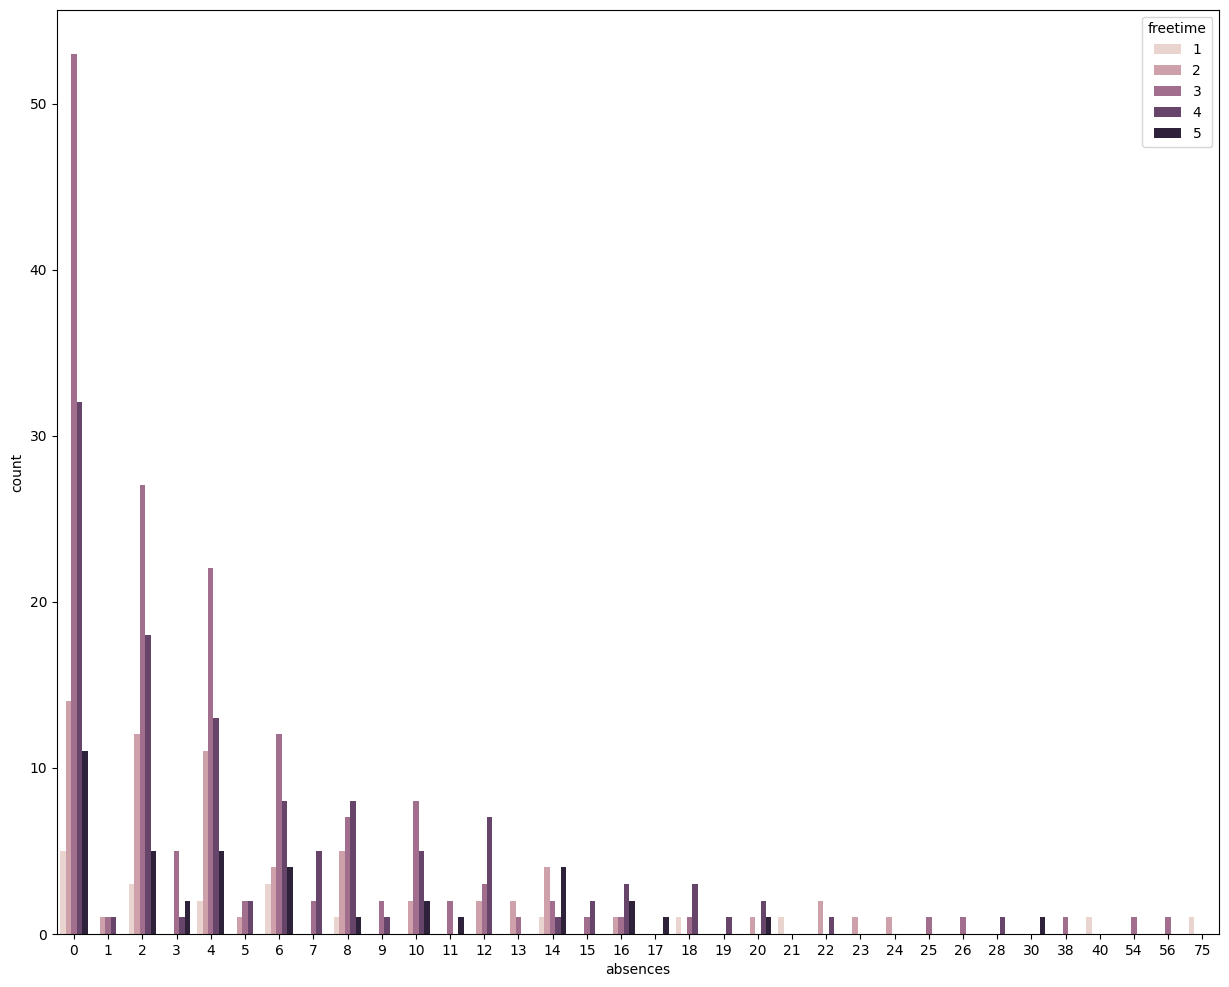

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(x='absences',hue='freetime',data=df)

In [ ]:
df['failures'].unique()

array([0, 3, 2, 1])

In [ ]:
df['studytime'].unique()

array([2, 3, 1, 4])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: xlabel='studytime', ylabel='count'>

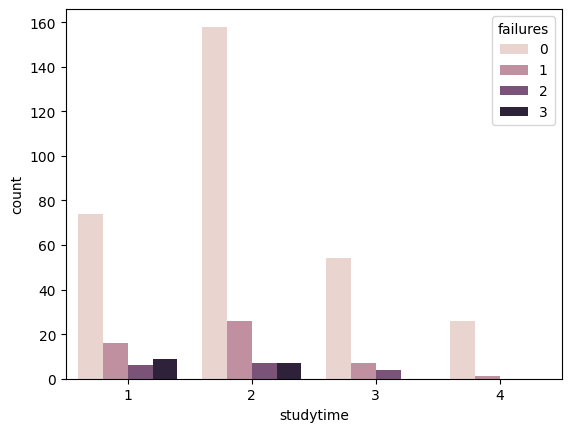

In [ ]:
sns.countplot(x='studytime',hue='failures',data=df)

those who study a limited 2hrs daily, have the least chances of failure even less than those who study 4hrs this shows why "smart work over hardwork" but even though the hardwork was for some cause as the students with 3 and 4 hours of studytime have no triple backlogs!

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='studytime', ylabel='count'>

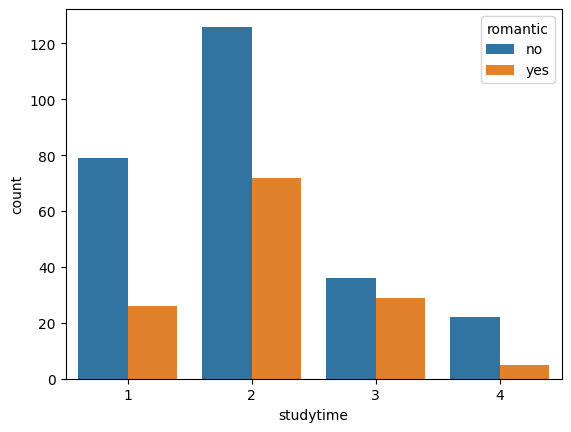

In [ ]:
sns.countplot(x='studytime',hue='romantic',data=df)

the students with higher study time have less count of romantic numbers

<Axes: xlabel='studytime', ylabel='count'>

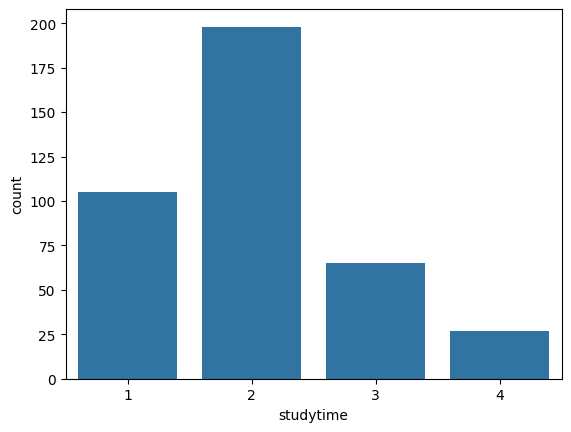

In [ ]:
sns.countplot(x='studytime',data=df)

well we see most of the students prefer a study time of 2 hrs (almost 200 out of 333)

In [ ]:
df['Fjob'].value_counts()

Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64

In [ ]:
df['Mjob'].value_counts()

Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: xlabel='Mjob', ylabel='count'>

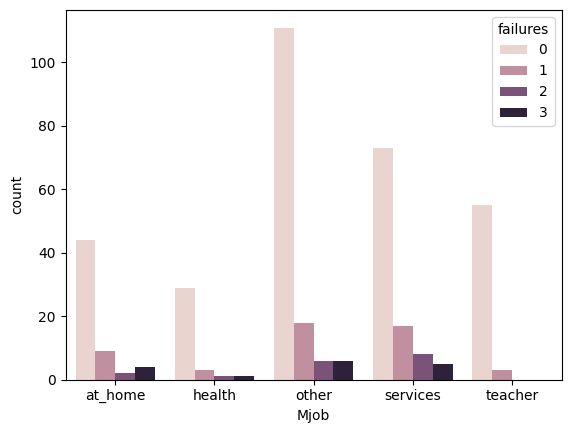

In [ ]:
sns.countplot(x='Mjob',hue='failures',data=df)

interesting, those students whose mother is a teacher never had 2 or 3 backlogs

<Axes: xlabel='failures', ylabel='count'>

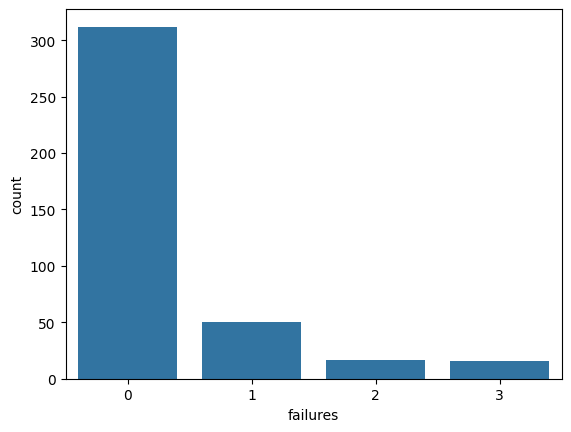

In [ ]:
sns.countplot(x='failures',data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: xlabel='Fjob', ylabel='count'>

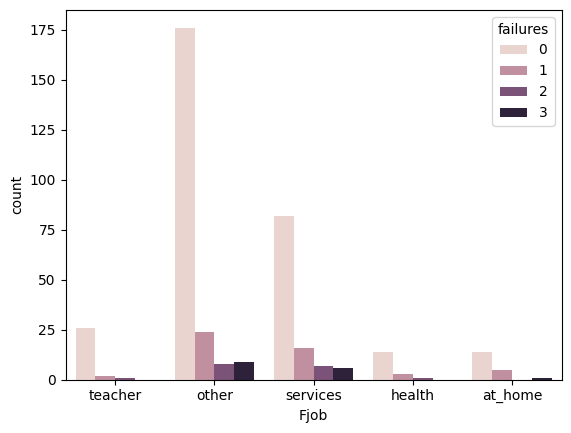

In [ ]:
sns.countplot(x='Fjob',hue='failures',data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: xlabel='traveltime', ylabel='count'>

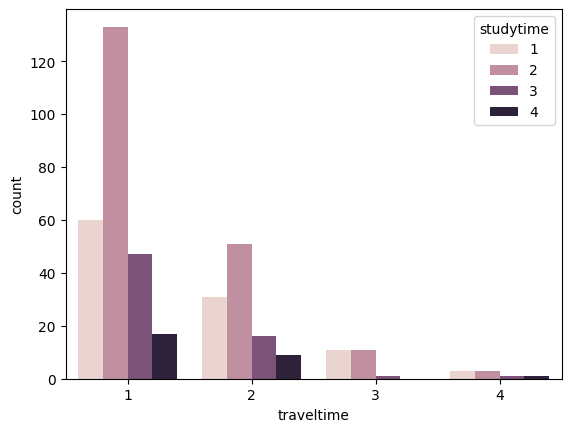

In [ ]:
sns.countplot(x='traveltime',hue='studytime',data=df)

<Axes: xlabel='traveltime', ylabel='count'>

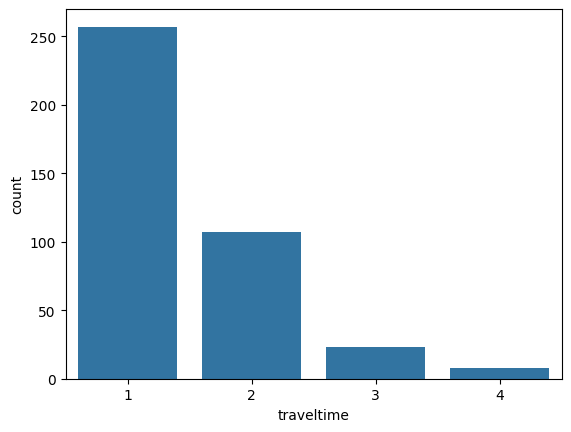

In [ ]:
sns.countplot(x='traveltime',data=df)

most students(257) have a traveltime of 1 hour from college to home

In [ ]:
df['traveltime'].value_counts()

traveltime
1    257
2    107
3     23
4      8
Name: count, dtype: int64

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


<Axes: xlabel='address', ylabel='count'>

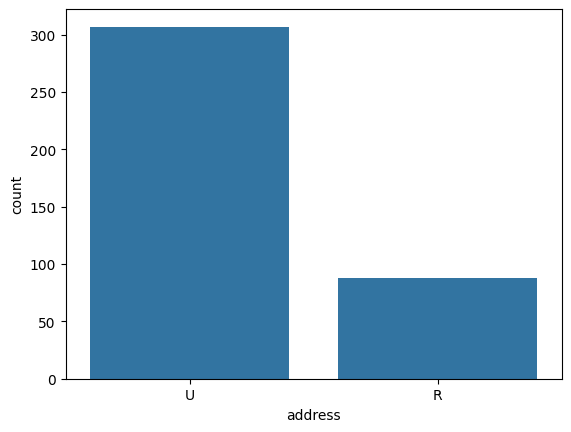

In [ ]:
sns.countplot(x='address',data=df)

majority students(307) are from urban areas

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='traveltime', ylabel='count'>

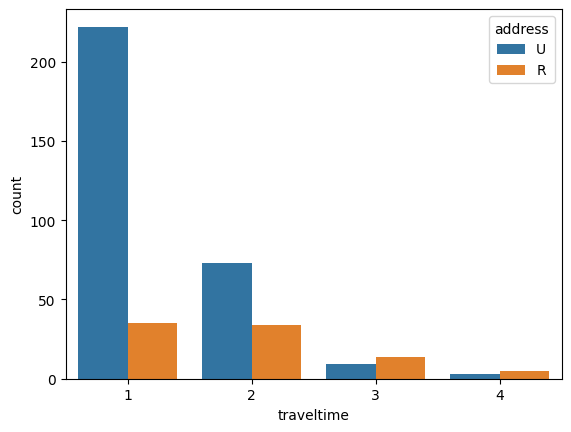

In [ ]:
sns.countplot(x='traveltime',hue='address',data=df)

most students from urban areas have 1-2 hours of travel time and most students from urban areas have 1 hour of travel time this somehow shows that the school must be in some outskirts areas of the city

In [ ]:
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


G1,G2,G3 are the grades

# Feature Engineering

In [ ]:
df['grade'] = (df['G1'] + df['G2'] + df['G3'])/3

In [ ]:
df = df.drop(columns = ['G1' , 'G2' , 'G3'])

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,8.666667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

there are a lot of object dtypes lets convert them using encoding

In [ ]:
le = LabelEncoder()
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    int64  
 1   sex         395 non-null    int64  
 2   age         395 non-null    int64  
 3   address     395 non-null    int64  
 4   famsize     395 non-null    int64  
 5   Pstatus     395 non-null    int64  
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    int64  
 9   Fjob        395 non-null    int64  
 10  reason      395 non-null    int64  
 11  guardian    395 non-null    int64  
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    int64  
 16  famsup      395 non-null    int64  
 17  paid        395 non-null    int64  
 18  activities  395 non-null    int64  
 19  nursery     395 non-null    i

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,5.666667
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,5.333333
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,10,8.333333
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,14.666667
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,8.666667


Text(0.5, 1.0, 'Coorelation Graph')

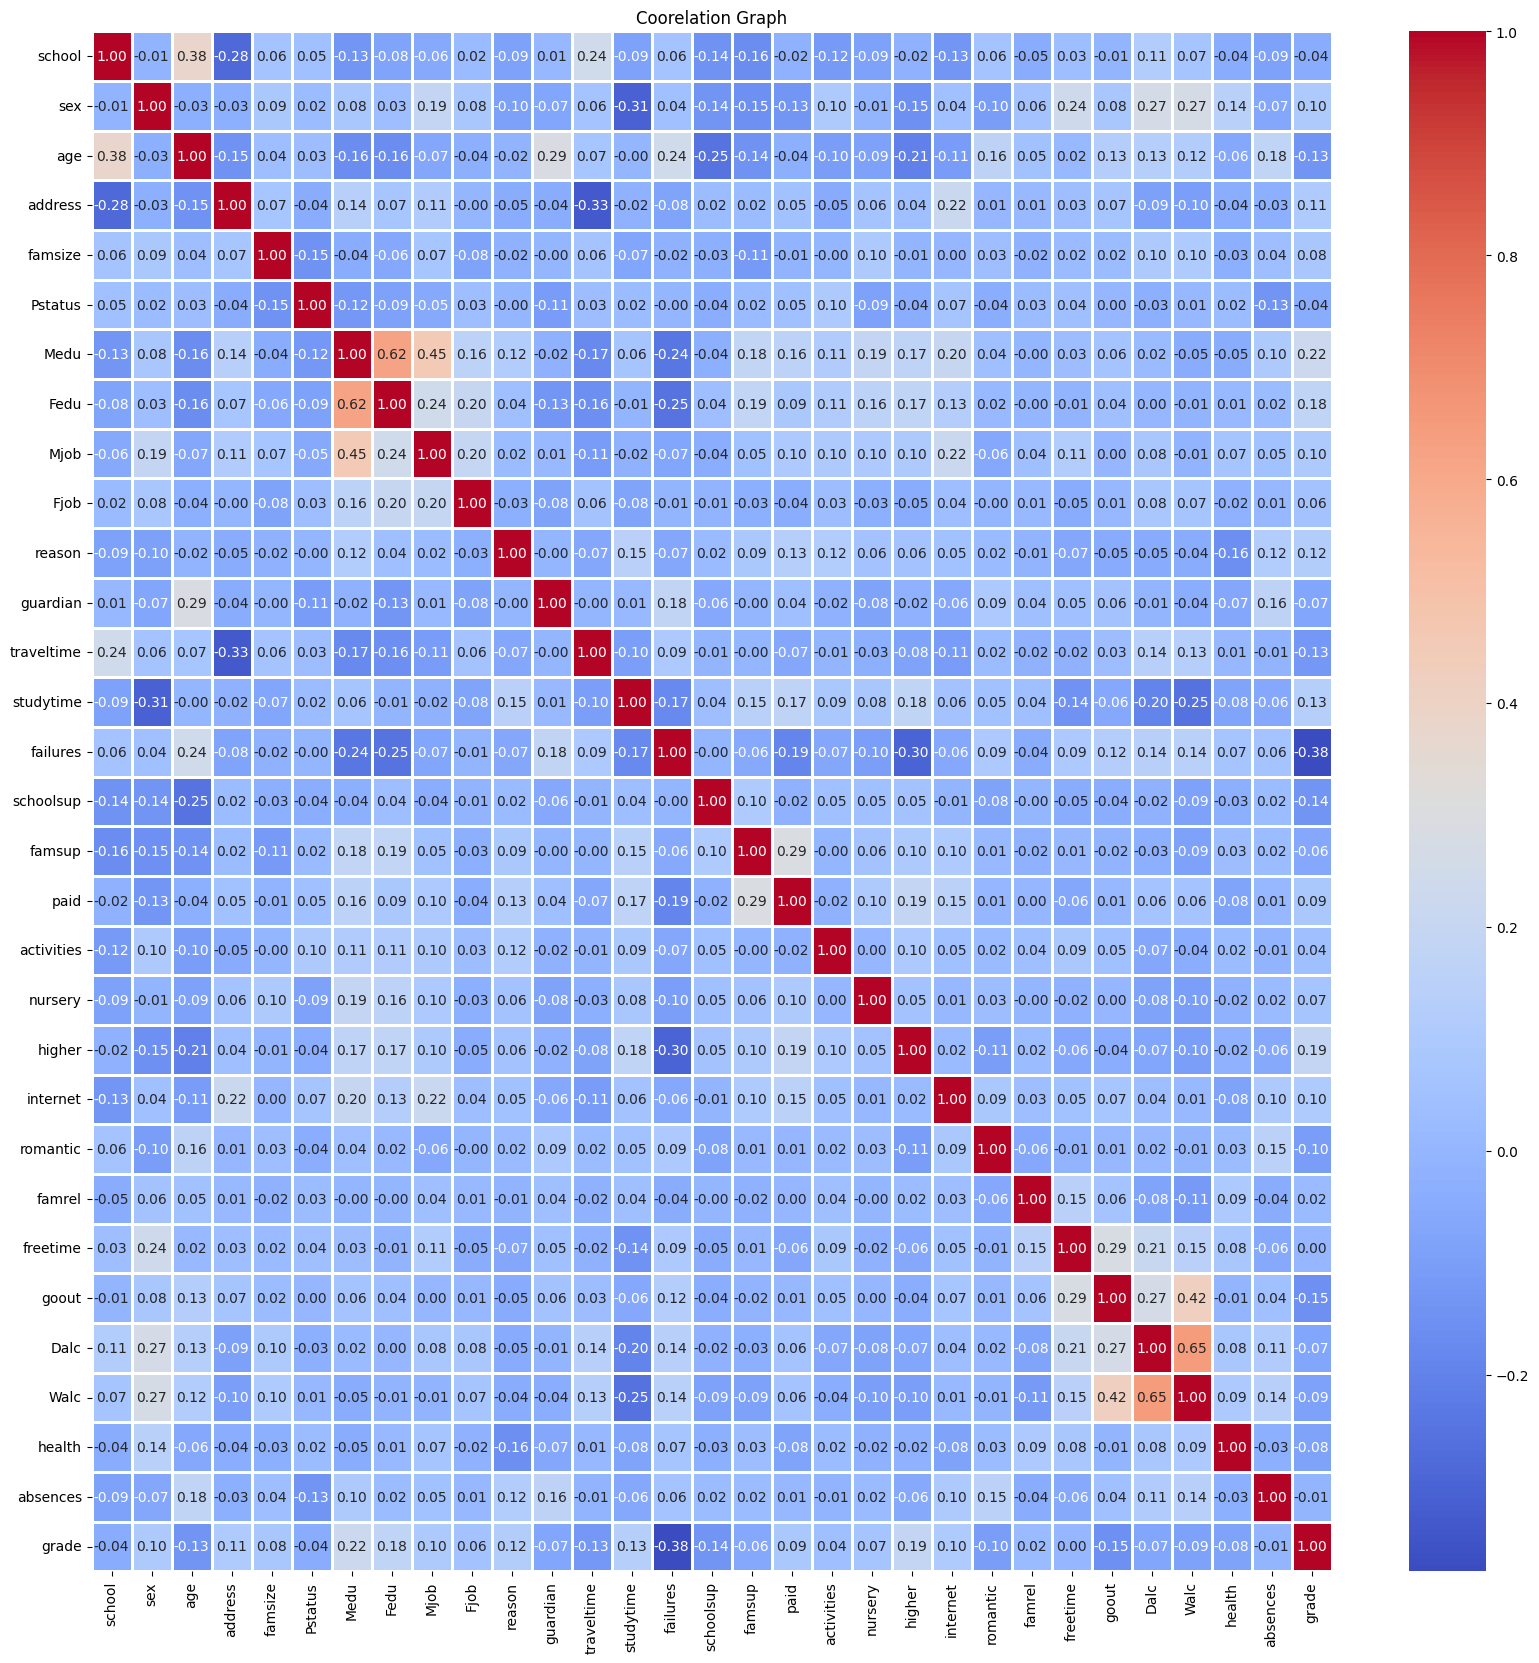

In [ ]:
data = df.corr()
plt.figure(figsize=(20, 20))  # Optional: Adjust figure size
sns.heatmap(data, annot=True, cmap='coolwarm', linewidths=2, fmt=".2f", annot_kws={"size": 10})
plt.title("Coorelation Graph")

In [ ]:
target_column = 'grade'
correlations = df.corr()[target_column]
sorted_features = correlations.abs().sort_values(ascending=False)
correlation_threshold = 0.1
selected_features = sorted_features[sorted_features >= correlation_threshold].index.tolist()
print(selected_features)

['grade', 'failures', 'Medu', 'higher', 'Fedu', 'goout', 'schoolsup', 'age', 'studytime', 'traveltime', 'reason', 'address', 'romantic', 'internet', 'sex']


so we have now a list of selected feature that have the highest correlation with our label

In [ ]:
sorted_features

grade         1.000000
failures      0.375759
Medu          0.224260
higher        0.189483
Fedu          0.175852
goout         0.154511
schoolsup     0.137644
age           0.134589
studytime     0.134565
traveltime    0.128197
reason        0.120118
address       0.107297
romantic      0.102731
internet      0.102628
sex           0.101122
Mjob          0.099646
paid          0.089511
Walc          0.088025
famsize       0.082560
health        0.080380
Dalc          0.072508
guardian      0.071126
nursery       0.065145
famsup        0.061553
Fjob          0.057452
school        0.043285
Pstatus       0.043048
activities    0.040859
famrel        0.021653
absences      0.005909
freetime      0.003773
Name: grade, dtype: float64

In [ ]:
X = df[['failures', 'Medu', 'higher', 'Fedu', 'goout', 'schoolsup', 'age', 'studytime', 'traveltime', 'reason', 'address', 'romantic', 'internet', 'sex']]
y = df['grade']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

let us train with ML models

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
print("Ridge Regression Mean Absolute Error:", ridge_mae)
print("Ridge Regression Mean Squared Error:", ridge_mse)
print('----------')
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
print("Lasso Regression Mean Absolute Error:", lasso_mae)
print("Lasso Regression Mean Squared Error:", lasso_mse)
print('----------')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
print("Random Forest Regression Mean Absolute Error:", rf_mae)
print("Random Forest Regression Mean Squared Error:", rf_mse)

Ridge Regression Mean Absolute Error: 2.8164684320262126
Ridge Regression Mean Squared Error: 11.495744778813327
----------
Lasso Regression Mean Absolute Error: 3.2458473535224055
Lasso Regression Mean Squared Error: 14.848439530701986
----------
Random Forest Regression Mean Absolute Error: 3.0981638537271436
Random Forest Regression Mean Squared Error: 13.136473618495069


hyperparameter tuning

In [ ]:
param_grid = {
    'alpha': np.linspace(0.1, 10, 100)
}
grid_search = GridSearchCV(Ridge(), param_grid=param_grid, cv=7)
grid_search.fit(X_train, y_train)

best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_

print("Best Hyperparameters (GridSearchCV):", best_params_grid)

Best Hyperparameters (GridSearchCV): {'alpha': 10.0}


In [ ]:
print(best_model_grid)

Ridge(alpha=10.0)


so lets now do training on best hyperparameters we obtained

In [ ]:
ridge = Ridge(alpha=10.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
print("Ridge Regression Mean Absolute Error:", ridge_mae)
print("Ridge Regression Mean Squared Error:", ridge_mse)

Ridge Regression Mean Absolute Error: 2.8001210598468247
Ridge Regression Mean Squared Error: 11.437419335434724
